# Практическая работа по машинному обучению №7  
## Студент: Анненко Михаил Юрьевич  
## Группа: 3825М1ФИ2  
## Задача: с теми же данными, что использовались в лабораторной работе №4, решить задачу кластеризации тремя методами: KMeans, DBSCAN и любым другим на выбор. Использовать PCA для понижения размерности и визуализации. При решении задачи обучения без учителя не использовать целевую метку `Revenue`. После получения кластеров — сравнить их с истинными метками (`Revenue`) и сделать выводы.  
## Тип задачи: обучение без учителя (кластеризация)  
## Датасет: [Online Shoppers Purchasing Intention Dataset](https://www.kaggle.com/datasets/imakash3011/online-shoppers-purchasing-intention-dataset)

## План выполнения лабораторной работы №7
- **0. Описание задачи**  
- **1. Загрузка данных**  
- **2. Разведочный анализ данных (EDA)**  
- **3. Обработка пропущенных значений и некорректных данных**  
- **4. Обработка категориальных признаков**  
- **5. Исключение коррелирующих переменных**  
- **6. Нормализация данных**  
- **7. Подготовка данных для кластеризации (исключение `Revenue`)**  
- **8. Применение PCA для понижения размерности**  
- **9. Кластеризация методом KMeans**  
- **10. Кластеризация методом DBSCAN**  
- **11. Кластеризация методом Agglomerative Clustering**  
- **12. Визуализация результатов кластеризации (на PCA)**  
- **13. Сравнение меток кластеров с истинными метками (`Revenue`)**  
- **14. Общие выводы**

## Описание признаков датасета

| Признак | Тип | Описание |
|---------|-----|----------|
| Administrative | int64 | Количество административных страниц, посещённых за сессию. |
| Administrative_Duration | float64 | Общее время, проведённое на административных страницах. |
| Informational | int64 | Количество информационных страниц, посещённых за сессию. |
| Informational_Duration | float64 | Общее время, проведённое на информационных страницах. |
| ProductRelated | int64 | Количество продуктовых страниц, посещённых за сессию. |
| ProductRelated_Duration | float64 | Общее время, проведённое на продуктовых страницах. |
| BounceRates | float64 | Процент пользователей, которые покинули сайт сразу после входа. |
| ExitRates | float64 | Процент просмотров, завершившихся на этой странице. |
| PageValues | float64 | Средняя ценность страницы для пользователя. |
| SpecialDay | float64 | Близость даты посещения к празднику (0 — нет, 1 — максимум). |
| Month | object | Месяц посещения (например, 'May', 'Nov'). |
| OperatingSystems | int64 | Код операционной системы. |
| Browser | int64 | Код браузера. |
| Region | int64 | Код региона. |
| TrafficType | int64 | Код типа трафика. |
| VisitorType | object | Тип посетителя: 'Returning_Visitor', 'New_Visitor', 'Other'. |
| Weekend | bool | True — выходной день, False — рабочий день. |
| Revenue | bool | Целевая переменная: True — покупка совершена, False — нет. |

## 0. Описание задачи

Цель работы — предсказать, совершит ли посетитель интернет-магазина покупку (`Revenue = True`) на основе поведенческих данных его сессии: количество и длительность посещённых страниц, источник трафика, тип устройства, день недели и другие признаки.  

Это задача **бинарной классификации**.  
Датасет содержит **12 330 сессий**, **18 признаков** (включая целевую переменную `Revenue`).  
Задача актуальна для бизнеса: позволяет выявлять потенциальных покупателей и персонализировать взаимодействие с ними.

## 0. Описание задачи
Цель данной работы — применить три метода кластеризации (**KMeans**, **DBSCAN** и **Agglomerative Clustering**) к тем же данным, что использовались в лабораторной работе №4, **не используя при этом целевую переменную `Revenue` на этапе обучения**.  
Это задача **обучения без учителя (unsupervised learning)**, поскольку истинные метки классов (`Revenue = True/False`) **не предоставляются алгоритмам кластеризации**.  

После получения меток кластеров от каждого метода необходимо **сравнить их с истинными метками `Revenue`**, чтобы оценить, насколько хорошо алгоритмы смогли восстановить скрытую структуру данных, связанную с фактом покупки.  

Для визуализации результатов кластеризации используется **метод главных компонент (PCA)**, снижающий размерность данных до 2D.  

Задача актуальна в реальных сценариях, когда метка `Revenue` недоступна (например, для новых пользователей), но необходимо сегментировать аудиторию для маркетинговых или аналитических целей.

## 1. Загрузка данных

Загружаем датасет из CSV-файла, проверяем размер и базовую структуру.

In [1]:
import pandas as pd

# Загрузка данных
df = pd.read_csv("online_shoppers_intention.csv")

# Проверка размера
print("Размер датасета:", df.shape)

# Первые и последние строки
df.head()

Размер датасета: (12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [2]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


## 2. Разведочный анализ данных (EDA)

Проводим полный EDA:
- типы данных и пропущенные значения,
- распределение целевой переменной,
- анализ категориальных и числовых признаков,
- корреляционная матрица,
- интерпретация ключевых зависимостей.

Названия столбцов:
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

Типы данных:
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Количество пропущенных значени

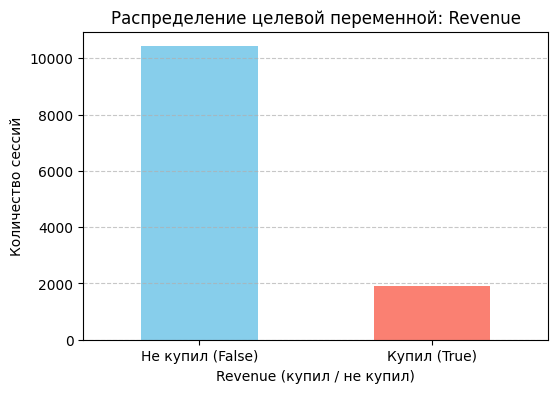

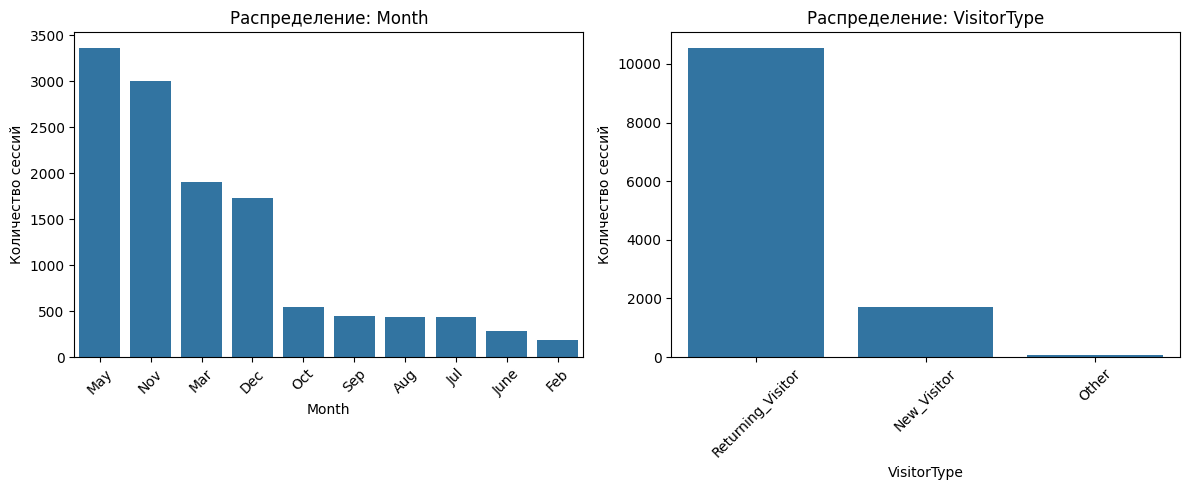


=== Распределение покупок по типу посетителя ===
                   Всего сессий  Покупок  Доля покупок
VisitorType                                           
New_Visitor                1694      422      0.249115
Other                        85       16      0.188235
Returning_Visitor         10551     1470      0.139323

=== Распределение покупок в зависимости от дня недели ===
         Всего сессий  Покупок  Доля покупок
Weekend                                     
False            9462     1409      0.148911
True             2868      499      0.173989

Пояснение:
  - Weekend = False -> сессия в будний день
  - Weekend = True  -> сессия в выходной день

Числовые признаки:
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']

=== Описательная статистика (describe) ===
       Administrative  A

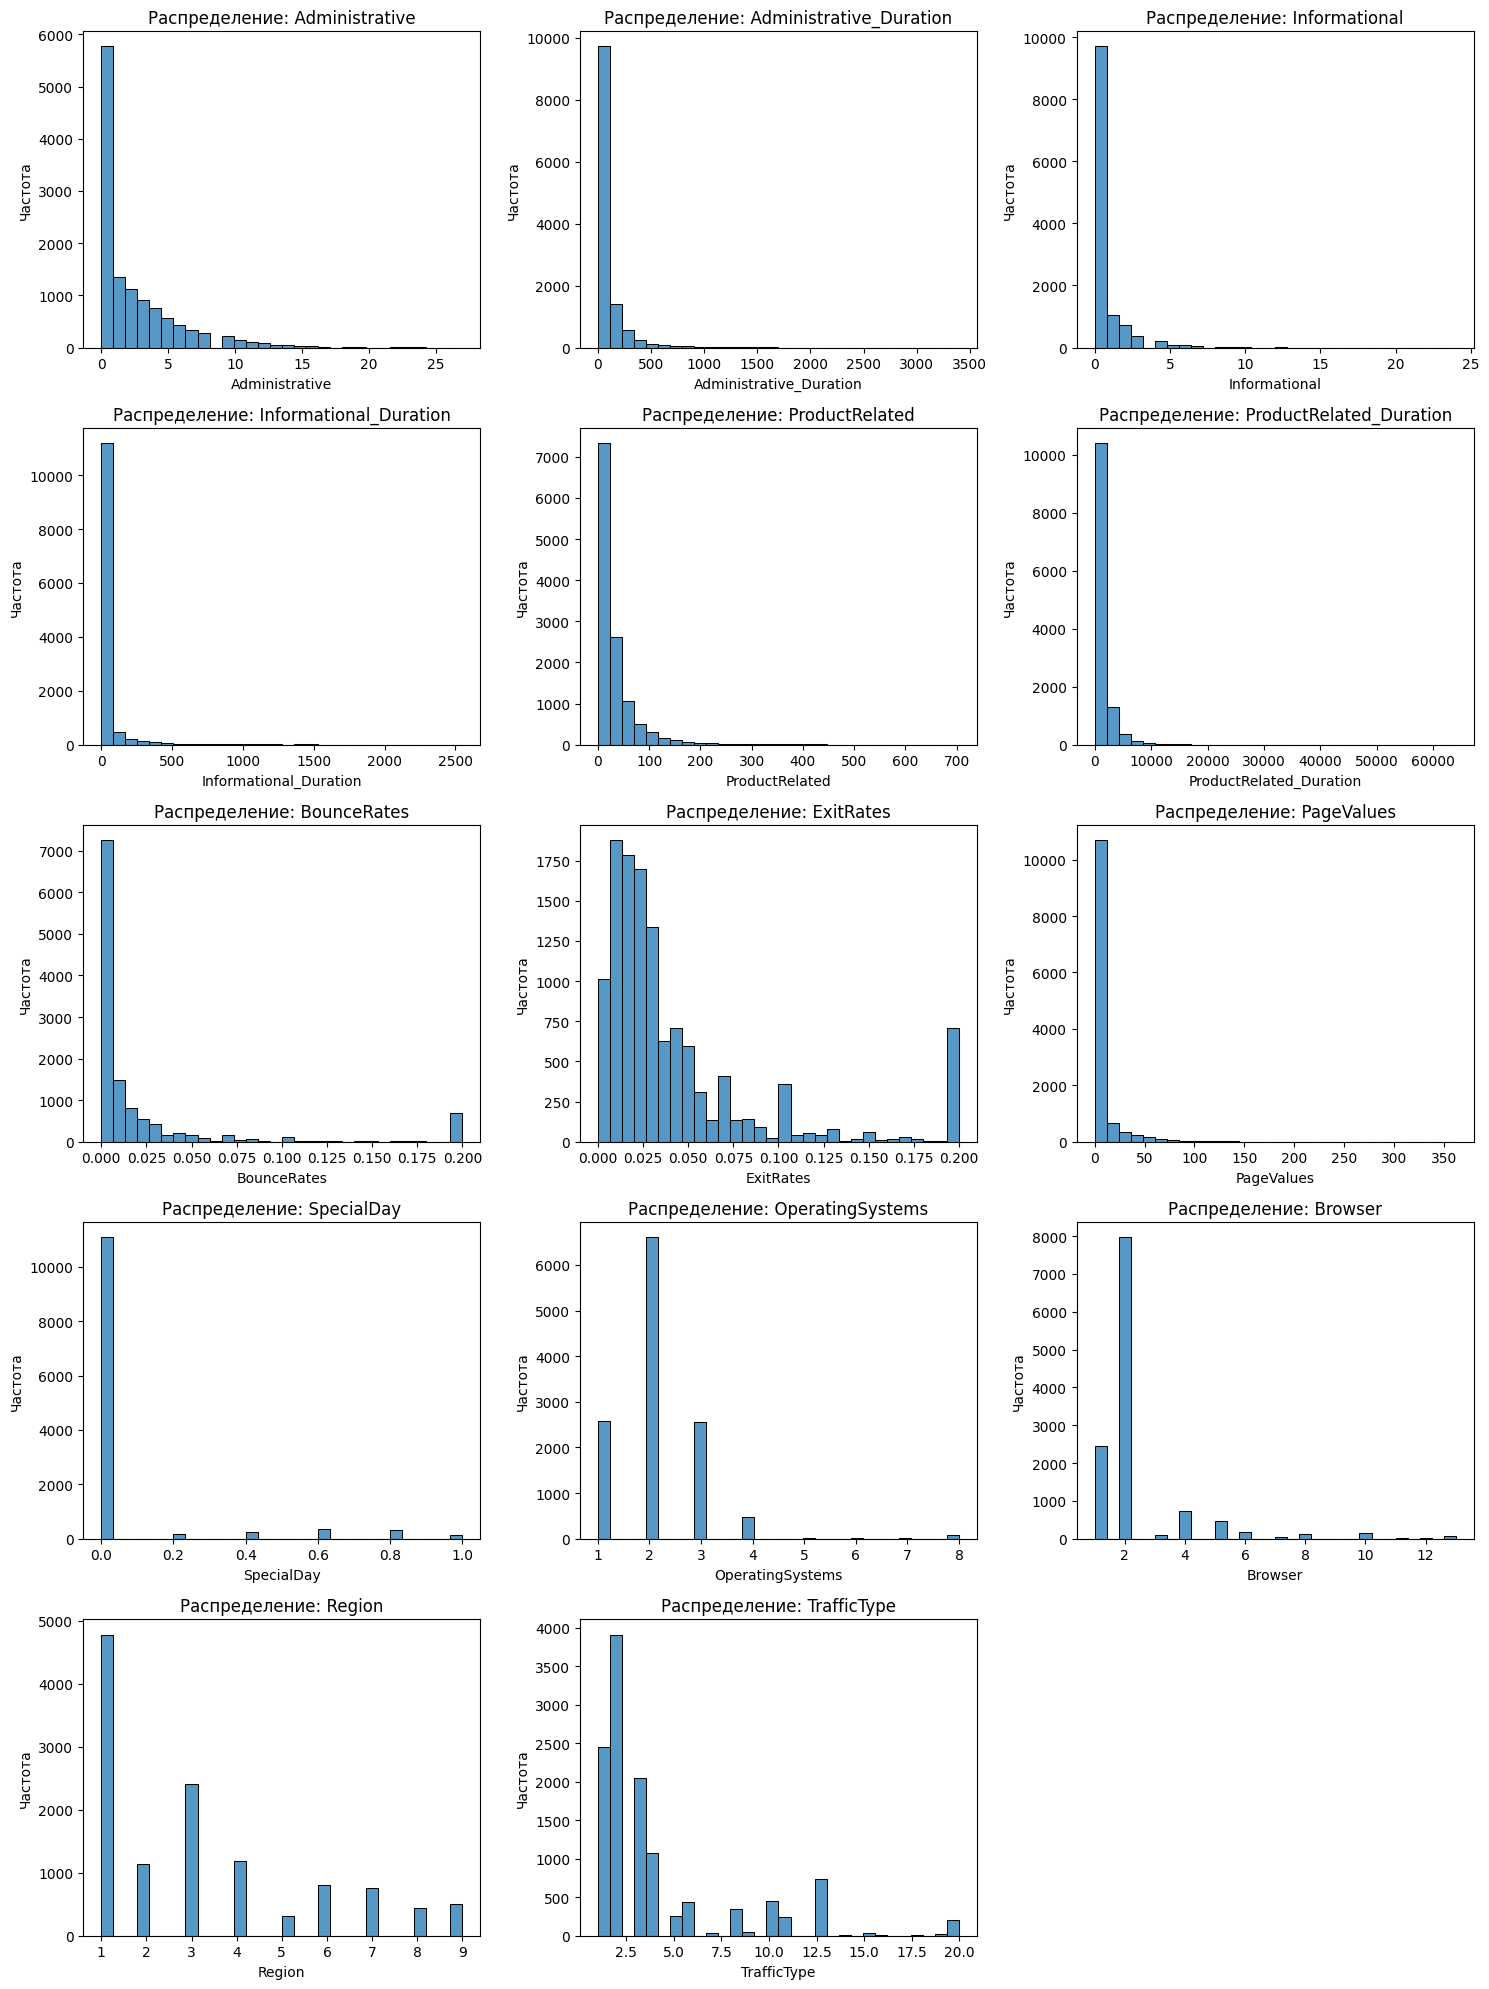


=== Бокс-плоты (анализ выбросов) ===


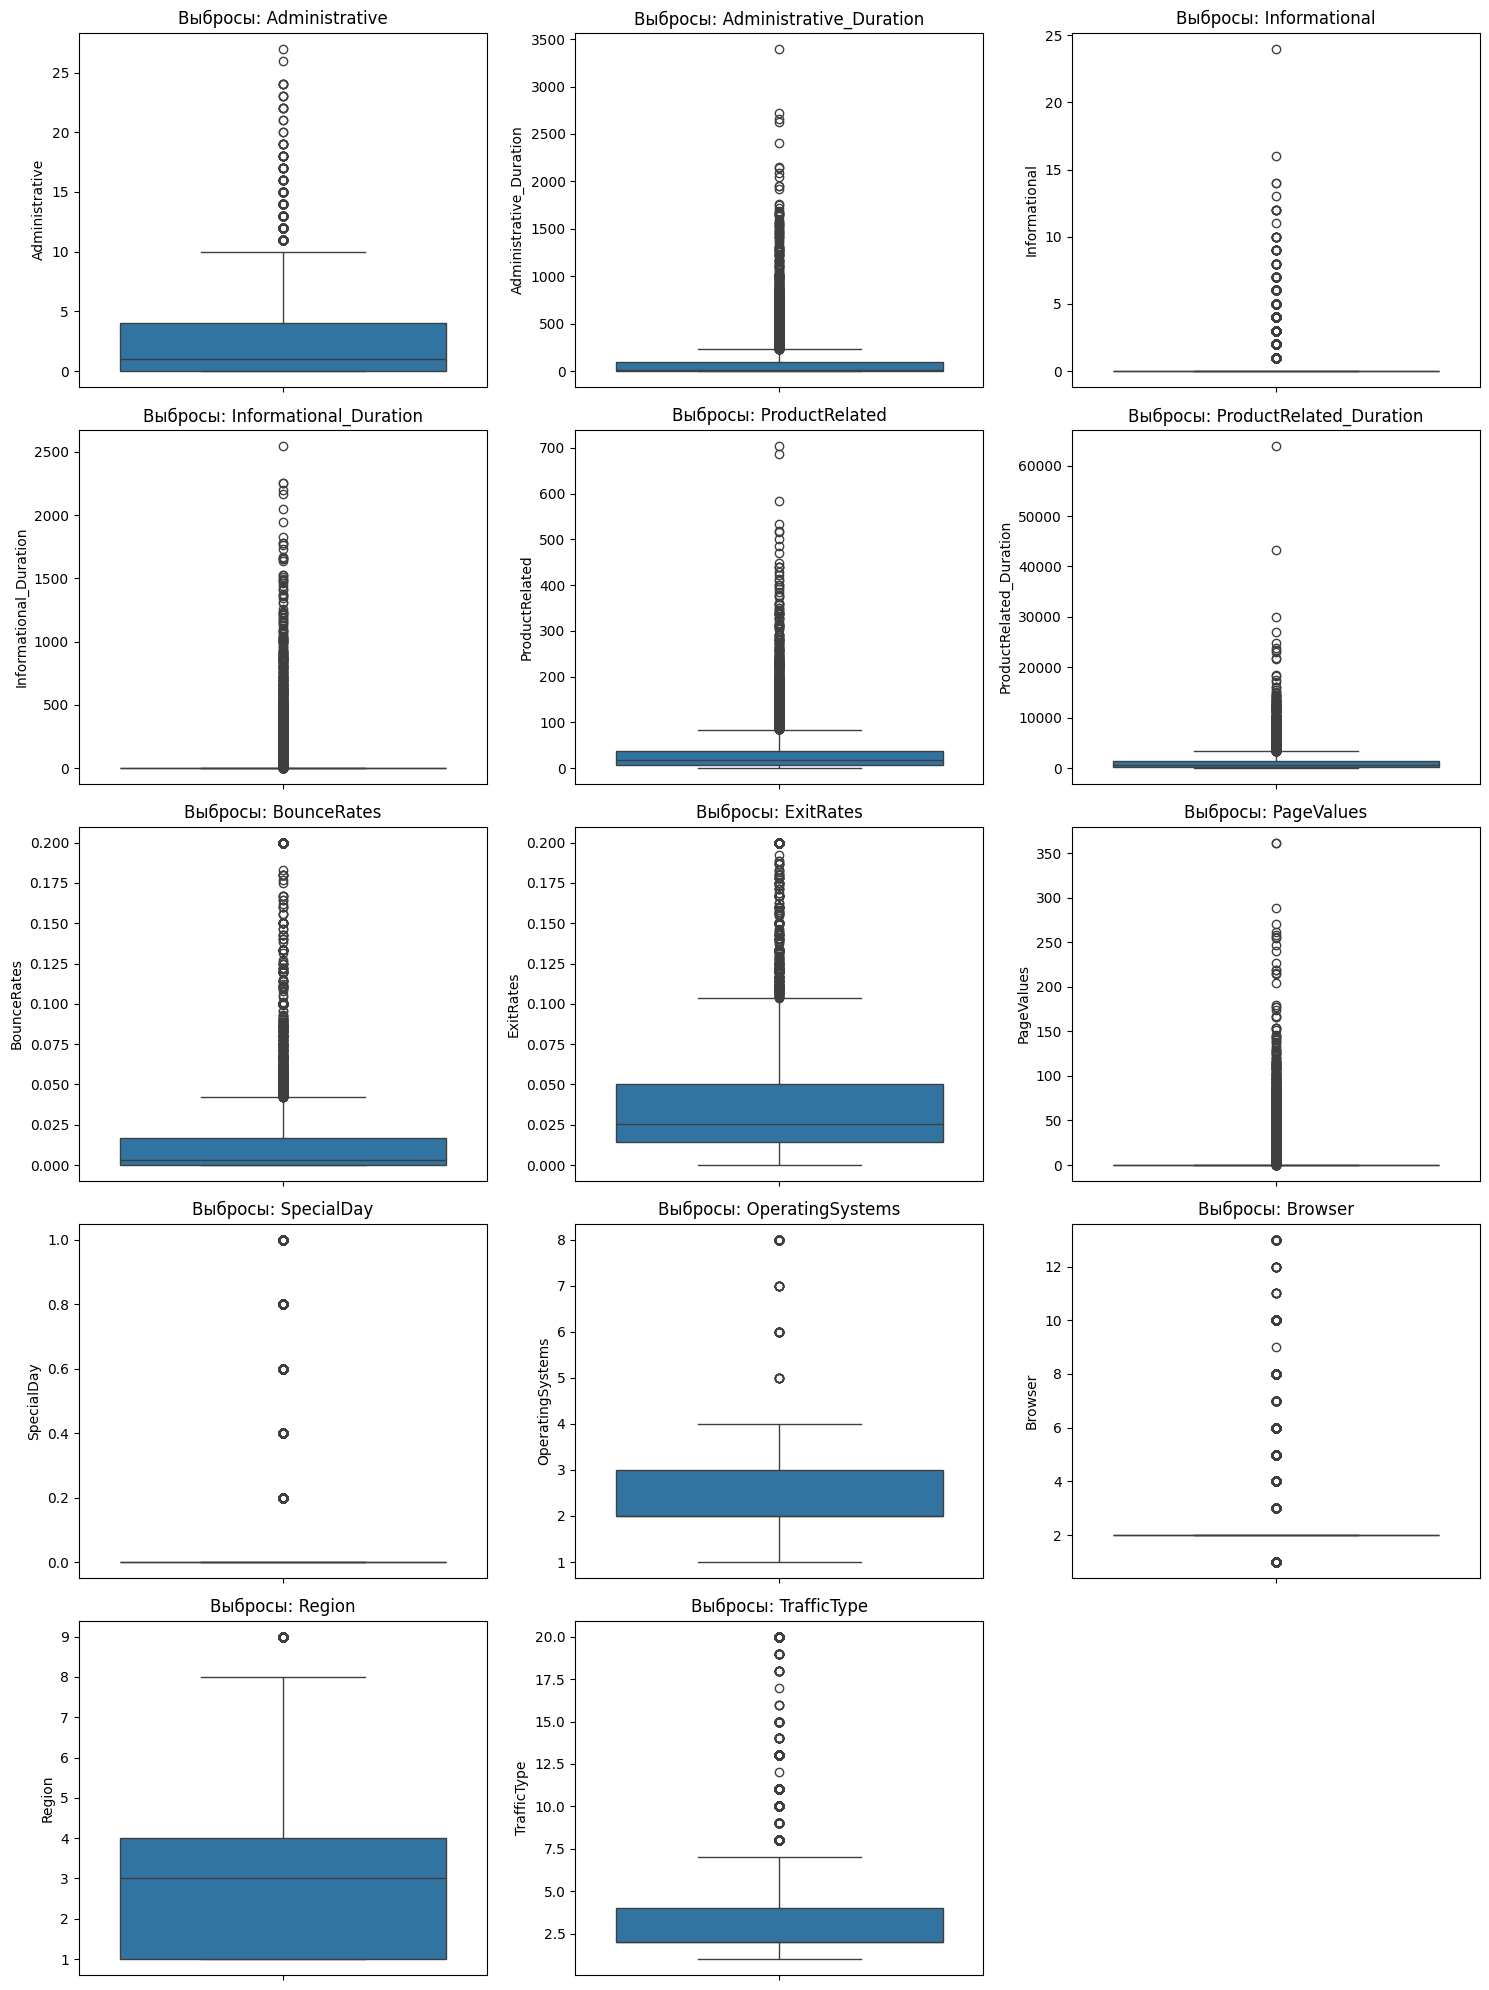


=== Интерпретация счётчиков посещений страниц ===

• Administrative :
  - Медиана = 1, 75% значений ≤ 4 — большинство пользователей заходит в этот раздел редко или не заходит вовсе.
  - 25% пользователей вообще не заходят в административные разделы (значение = 0).
  - Максимальное значение = 27 — это аномалия, возможно, бот или пользователь, который долго заполнял форму.
  - Вывод: так как этот признак не связан с покупкой, то основная масса пользователей его игнорирует.

• Informational :
  - Медиана = 0, 75% значений = 0 — почти никто не интересуется информацией.
  - Среднее = 0.5 — в среднем пользователь заходит в этот раздел менее одного раза.
  - Максимум = 24 — один пользователь был очень любопытен, но это исключение.
  - Вывод: этот признак не влияет на покупку, так как информация не является основной целью посетителя.

• ProductRelated :
  - Медиана = 18, 75% значений ≤ 38 — большинство пользователей активно изучают товары.
  - 25% пользователей просматривают менее 7 товаров —

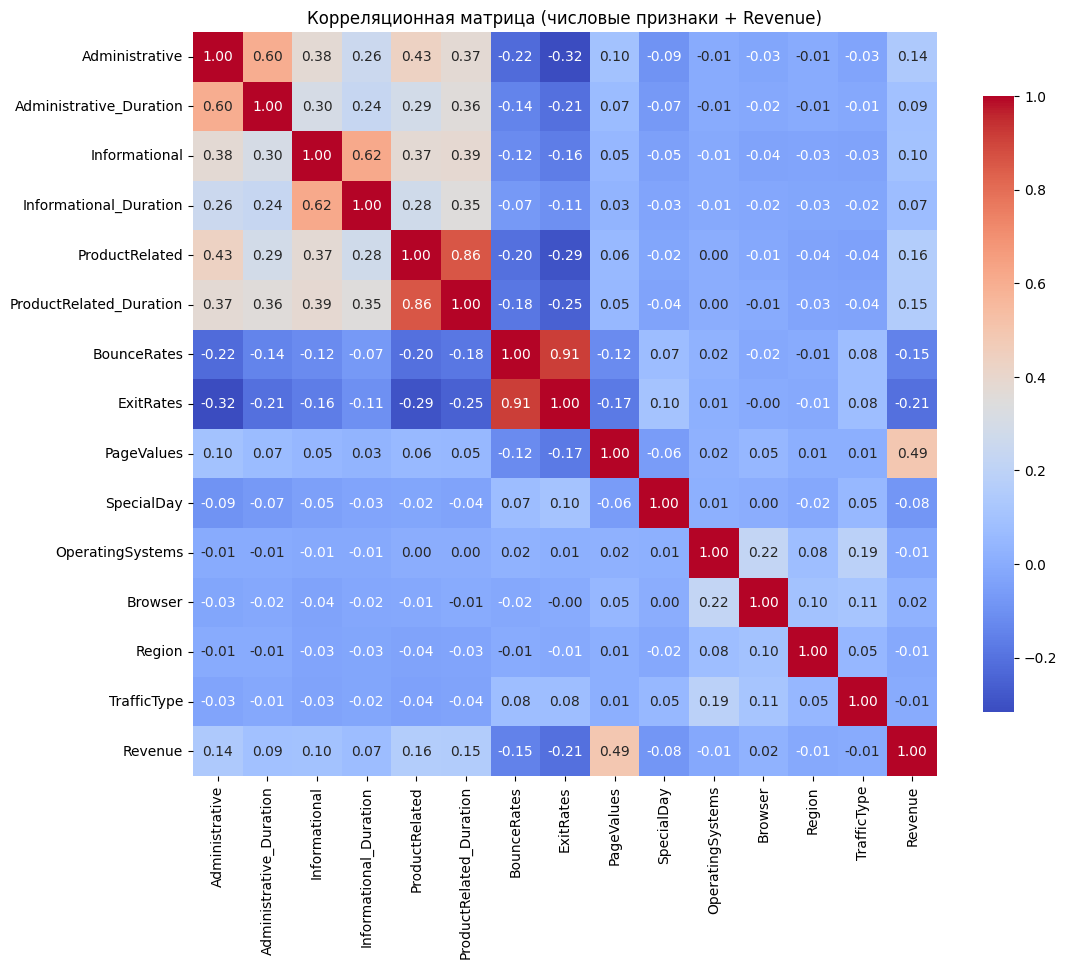


=== Признаки, коррелирующие с Revenue (|r| > 0.1) ===
PageValues                 0.492569
ExitRates                 -0.207071
ProductRelated             0.158538
ProductRelated_Duration    0.152373
BounceRates               -0.150673
Administrative             0.138917
Name: Revenue, dtype: float64

=== Сильно коррелирующие между собой признаки (|r| > 0.8) ===
ProductRelated  ProductRelated_Duration    0.860927
BounceRates     ExitRates                  0.913004
dtype: float64

=== Интерпретация корреляционной матрицы ===
• Наиболее сильно с целевой переменной `Revenue` коррелируют:
  - PageValues (r = 0.49) — чем выше ценность страницы, тем выше вероятность покупки.
  - ProductRelated (r = 0.16) — чем больше товаров просмотрено, тем выше шанс покупки.
  - BounceRates (r = -0.15) — чем ниже отказы, тем выше шанс покупки.

• Сильно коррелирующие между собой признаки (|r| > 0.8):
  - BounceRates и ExitRates (r = 0.91) — почти идентичны, один из них можно удалить.
  - ProductRelated и Pr

In [3]:
# Убираем лишние пробелы в названиях столбцов (на всякий случай)
df.columns = df.columns.str.strip()

# Выводим основную информацию
print("Названия столбцов:")
print(df.columns.tolist())
print("\nТипы данных:")
print(df.dtypes)
print("\nКоличество пропущенных значений по столбцам:")
missing = df.isnull().sum()
print(missing[missing > 0])
if missing.sum() == 0:
    print("\nПропущенных значений нет!")
else:
    print(f"\nВсего пропущенных значений: {missing.sum()}")

# Категориальные, бинарные, числовые признаки
categorical_columns = [col for col in df.columns if df[col].dtype.name == 'object']
binary_columns = [col for col in df.columns if df[col].dtype.name == 'bool']
numerical_columns = [col for col in df.columns if df[col].dtype.name not in ['object', 'bool']]

print("Категориальные признаки (object):")
print(categorical_columns)
print("\nБинарные признаки (bool):")
print(binary_columns)
print("\nЧисловые признаки:")
print(numerical_columns)

# === Анализ целевой переменной ===
import matplotlib.pyplot as plt

revenue_counts = df['Revenue'].value_counts()
print("\nРаспределение целевой переменной 'Revenue':")
print(revenue_counts)

revenue_props = df['Revenue'].value_counts(normalize=True)
print("\nДоли классов:")
print(revenue_props)

plt.figure(figsize=(6, 4))
revenue_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Распределение целевой переменной: Revenue')
plt.xlabel('Revenue (купил / не купил)')
plt.ylabel('Количество сессий')
plt.xticks(ticks=[0, 1], labels=['Не купил (False)', 'Купил (True)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# === Анализ категориальных признаков ===
import seaborn as sns

cat_features = categorical_columns
fig, axes = plt.subplots(1, len(cat_features), figsize=(6 * len(cat_features), 5))
if len(cat_features) == 1:
    axes = [axes]
for i, col in enumerate(cat_features):
    counts = df[col].value_counts()
    sns.barplot(x=counts.index, y=counts.values, ax=axes[i])
    axes[i].set_title(f'Распределение: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Количество сессий')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# === Распределение покупок по типу посетителя ===
if 'VisitorType' in cat_features:
    print("\n=== Распределение покупок по типу посетителя ===")
    visitor_revenue = df.groupby('VisitorType')['Revenue'].agg(['count', 'sum', 'mean'])
    visitor_revenue.columns = ['Всего сессий', 'Покупок', 'Доля покупок']
    print(visitor_revenue)

# === Анализ Weekend ===
print("\n=== Распределение покупок в зависимости от дня недели ===")
weekend_revenue = df.groupby('Weekend')['Revenue'].agg(['count', 'sum', 'mean'])
weekend_revenue.columns = ['Всего сессий', 'Покупок', 'Доля покупок']
print(weekend_revenue)
print("\nПояснение:")
print("  - Weekend = False -> сессия в будний день")
print("  - Weekend = True  -> сессия в выходной день")

# === Анализ числовых признаков ===
num_features = [col for col in numerical_columns if col != 'Revenue']
print("\nЧисловые признаки:")
print(num_features)

print("\n=== Описательная статистика (describe) ===")
print(df[num_features].describe())

# Гистограммы
print("\n=== Гистограммы распределений числовых признаков ===")
n_cols = 3
n_rows = (len(num_features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten() if len(num_features) > 1 else [axes]
for i, col in enumerate(num_features):
    sns.histplot(df[col], kde=False, ax=axes[i], bins=30)
    axes[i].set_title(f'Распределение: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

# Бокс-плоты
print("\n=== Бокс-плоты (анализ выбросов) ===")
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten() if len(num_features) > 1 else [axes]
for i, col in enumerate(num_features):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Выбросы: {col}')
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

# === Интерпретация числовых признаков ===
print("\n=== Интерпретация счётчиков посещений страниц ===\n")
print("• Administrative :")
print("  - Медиана = 1, 75% значений ≤ 4 — большинство пользователей заходит в этот раздел редко или не заходит вовсе.")
print("  - 25% пользователей вообще не заходят в административные разделы (значение = 0).")
print("  - Максимальное значение = 27 — это аномалия, возможно, бот или пользователь, который долго заполнял форму.")
print("  - Вывод: так как этот признак не связан с покупкой, то основная масса пользователей его игнорирует.")

print("\n• Informational :")
print("  - Медиана = 0, 75% значений = 0 — почти никто не интересуется информацией.")
print("  - Среднее = 0.5 — в среднем пользователь заходит в этот раздел менее одного раза.")
print("  - Максимум = 24 — один пользователь был очень любопытен, но это исключение.")
print("  - Вывод: этот признак не влияет на покупку, так как информация не является основной целью посетителя.")

print("\n• ProductRelated :")
print("  - Медиана = 18, 75% значений ≤ 38 — большинство пользователей активно изучают товары.")
print("  - 25% пользователей просматривают менее 7 товаров — они либо быстро находят нужное, либо уходят.")
print("  - Максимум = 705 — это аномалия, возможно, пользователь, который долго сравнивал товары.")
print("  - Вывод: этот признак сильно связан с покупкой — чем больше товаров просмотрено, тем выше шанс совершить покупку.")

print("\n=== Интерпретация признаков длительности ===\n")
print("• Administrative_Duration :")
print("  - Медиана = 7.5 секунд, 25% пользователей вообще не тратят времени (значение = 0).")
print("  - 75% пользователей проводят менее 93 секунд (~1.5 минуты) в этом разделе.")
print("  - Максимум = 3398 секунд — один пользователь провёл почти час, но это аномалия.")
print("  - Вывод: этот признак слабо коррелирует с покупкой, так как основная масса пользователей его игнорирует.")

print("\n• Informational_Duration :")
print("  - Медиана = 0, 75% значений = 0 — почти никто не тратит время на информацию.")
print("  - Среднее = 34 секунды — в среднем пользователь проводит меньше минуты.")
print("  - Максимум = 2549 секунд (~42 минуты) — один пользователь был очень любопытен, но это исключение.")
print("  - Вывод: этот признак, скорее всего, не влияет на покупку, так как информация не является основной целью посетителя.")

print("\n• ProductRelated_Duration :")
print("  - Медиана = 599 секунд (~10 минут), 75% пользователей проводят менее 24 минут на товарах.")
print("  - 25% пользователей тратят менее 3 минут — они либо быстро находят нужное, либо уходят.")
print("  - Максимум = 63973 секунд (~17.7 часов) — это аномалия, возможно, пользователь, который забыл закрыть вкладку.")
print("  - Вывод: этот признак сильно связан с покупкой — чем дольше пользователь изучает товары, тем выше шанс совершить покупку.")

print("\n=== Интерпретация поведенческих признаков: BounceRates, ExitRates, PageValues ===\n")
print("• BounceRates :")
print("  - Медиана = 0.0031 — большинство сессий не являются 'отказами'.")
print("  - 75% значений ≤ 0.0168 — только 25% сессий имеют высокий показатель отказов.")
print("  - Максимум = 0.2 — в худшем случае 20% пользователей уходят сразу, но это редкость.")
print("  - Вывод: низкий BounceRate может быть признаком вовлечённости и предвестником покупки.")

print("\n• ExitRates :")
print("  - Медиана = 0.025 — в среднем 2.5% просмотров завершаются на данной странице.")
print("  - 75% значений ≤ 0.05 — большинство страниц не являются 'финальными'.")
print("  - Максимум = 0.2 — в редких случаях страница завершает все сессии.")
print("  - Вывод: ExitRates менее информативен, чем BounceRates, но всё же может указывать на 'тупиковые' страницы.")

print("\n• PageValues :")
print("  - Медиана = 0, 75% значений = 0 — большинство страниц не ведут к покупке.")
print("  - Среднее = 5.89 — за счёт редких, но очень ценных страниц (максимум = 361.76).")
print("  - Это ключевой признак: высокий PageValues почти всегда означает, что пользователь близок к покупке.")
print("  - Вывод: PageValues — один из самых важных предикторов для модели.")

print("\n=== Интерпретация SpecialDay и технических признаков ===\n")
print("• SpecialDay :")
print("  - 75% значений = 0 -> абсолютное большинство сессий — в обычные дни.")
print("  - Максимум = 1.0 — означает день, максимально близкий к празднику (например, 8 февраля для Valentine's Day).")
print("  - Среднее = 0.06 — только небольшая часть пользователей посещает сайт в праздничные периоды.")
print("  - Вывод: этот признак, вероятно, слабо влияет на вероятность покупки, так как праздничные дни редки.")

print("\n• Технические признаки (OperatingSystems, Browser, Region, TrafficType):")
print("  - Все они закодированы целыми числами от 1 до максимума (например, Browser: 1–13).")
print("  - Распределение неравномерное: некоторые ОС/браузеры/регионы/источники трафика встречаются чаще других.")
print("  - Например, Browser = 2 и TrafficType = 2 доминируют — это, скорее всего, популярные браузер и источник трафика.")
print("  - Вывод: эти признаки могут быть полезны, если, например, пользователи из определённого региона или через определённый источник чаще совершают покупки.")

# === Корреляционная матрица ===
import numpy as np

df_corr = df.copy()
df_corr['Revenue'] = df_corr['Revenue'].astype(int)
numeric_for_corr = [col for col in numerical_columns if col != 'Revenue'] + ['Revenue']
corr_matrix = df_corr[numeric_for_corr].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    cbar_kws={"shrink": .8}
)
plt.title("Корреляционная матрица (числовые признаки + Revenue)")
plt.show()

# Признаки, коррелирующие с Revenue
print("\n=== Признаки, коррелирующие с Revenue (|r| > 0.1) ===")
revenue_corr = corr_matrix['Revenue'].drop('Revenue')
strong_corr = revenue_corr[revenue_corr.abs() > 0.1].sort_values(key=abs, ascending=False)
print(strong_corr)

# Сильно коррелирующие между собой
print("\n=== Сильно коррелирующие между собой признаки (|r| > 0.8) ===")
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_pairs = upper.stack().abs() > 0.8
if high_corr_pairs.any():
    print(upper.stack()[high_corr_pairs])
else:
    print("Сильно коррелирующих признаков (|r| > 0.8) не найдено.")

# Интерпретация корреляции
print("\n=== Интерпретация корреляционной матрицы ===")
print("• Наиболее сильно с целевой переменной `Revenue` коррелируют:")
print("  - PageValues (r = 0.49) — чем выше ценность страницы, тем выше вероятность покупки.")
print("  - ProductRelated (r = 0.16) — чем больше товаров просмотрено, тем выше шанс покупки.")
print("  - BounceRates (r = -0.15) — чем ниже отказы, тем выше шанс покупки.")
print("\n• Сильно коррелирующие между собой признаки (|r| > 0.8):")
print("  - BounceRates и ExitRates (r = 0.91) — почти идентичны, один из них можно удалить.")
print("  - ProductRelated и ProductRelated_Duration (r = 0.86) — оба отражают активность пользователя,")
print("    можно оставить только один (например, ProductRelated).")
print("\n• Для улучшения модели стоит:")
print("  - Удалить один из сильно коррелирующих признаков (например, ExitRates или ProductRelated_Duration),")
print("    чтобы избежать мультиколлинеарности.")
print("  - Оставить все признаки с |r| > 0.1 с Revenue — они могут быть полезны для предсказания.")

## 3. Обработка пропущенных значений и некорректных данных

Проверяем:
- наличие пропущенных значений,
- логические несогласованности (например, длительность > 0 при числе посещений = 0),
- выбросы (строки вне квантилей 0.005–0.995),
- итоговый размер датасета после очистки.

In [4]:
# === Поиск и обработка некорректных данных ===
print("=== Поиск и обработка некорректных данных ===")

# 0. Проверка пропущенных значений
print("\n0. Проверка пропущенных значений:")
missing_before = df.isnull().sum()
if missing_before.sum() == 0:
    print("  -> Пропущенных значений в исходных данных нет.")
else:
    print(missing_before[missing_before > 0])

# 1. Логические несогласованности (оставляем как есть)
inconsistent_admin = df[(df['Administrative'] == 0) & (df['Administrative_Duration'] > 0)]
inconsistent_info = df[(df['Informational'] == 0) & (df['Informational_Duration'] > 0)]
inconsistent_prod = df[(df['ProductRelated'] == 0) & (df['ProductRelated_Duration'] > 0)]
print(f"\n1. Логические несогласованности:")
print(f"  • Административные: {len(inconsistent_admin)} строк")
print(f"  • Информационные: {len(inconsistent_info)} строк")
print(f"  • Продуктовые: {len(inconsistent_prod)} строк")

# Исправляем: если посещений = 0, то длительность = 0
df_clean = df.copy()
df_clean.loc[df_clean['Administrative'] == 0, 'Administrative_Duration'] = 0
df_clean.loc[df_clean['Informational'] == 0, 'Informational_Duration'] = 0
df_clean.loc[df_clean['ProductRelated'] == 0, 'ProductRelated_Duration'] = 0
print("\n  -> Исправлено: длительность = 0, если посещений = 0.")

# 2. Удаление выбросов через квантили (0.005 и 0.995)
print("\n2. Удаление выбросов через квантили (0.005 и 0.995):")
# Выбираем числовые признаки (без Revenue)
numerical_columns = [col for col in df.columns if df[col].dtype.name not in ['object', 'bool']]
numeric_for_outliers = [col for col in numerical_columns if col != 'Revenue']

# Для каждого числового признака находим квантили
outlier_mask = pd.Series([False] * len(df_clean), index=df_clean.index)
for col in numeric_for_outliers:
    q_low = df_clean[col].quantile(0.005)
    q_high = df_clean[col].quantile(0.995)
    outlier_mask |= (df_clean[col] < q_low) | (df_clean[col] > q_high)

print(f"  • Всего строк до удаления: {len(df_clean)}")
print(f"  • Строк, попадающих в выбросы: {outlier_mask.sum()}")
# Удаляем выбросы
df_clean = df_clean[~outlier_mask]
print(f"  • Осталось строк после удаления: {len(df_clean)}")

# 3. Итоговая проверка пропусков
missing_after = df_clean.isnull().sum()
if missing_after.sum() == 0:
    print("\nПосле обработки пропущенных значений нет.")
else:
    print("\nОбнаружены пропущенные значения:")
    print(missing_after[missing_after > 0])

# Финальные размеры
print(f"\nИсходный размер: {df.shape}")
print(f"Размер после очистки: {df_clean.shape}")
print(f"Удалено строк: {df.shape[0] - df_clean.shape[0]}")

=== Поиск и обработка некорректных данных ===

0. Проверка пропущенных значений:
  -> Пропущенных значений в исходных данных нет.

1. Логические несогласованности:
  • Административные: 0 строк
  • Информационные: 0 строк
  • Продуктовые: 0 строк

  -> Исправлено: длительность = 0, если посещений = 0.

2. Удаление выбросов через квантили (0.005 и 0.995):
  • Всего строк до удаления: 12330
  • Строк, попадающих в выбросы: 415
  • Осталось строк после удаления: 11915

После обработки пропущенных значений нет.

Исходный размер: (12330, 18)
Размер после очистки: (11915, 18)
Удалено строк: 415


## 4. Обработка категориальных признаков 
## и
## 5. Исключение коррелирующих переменных

Категориальные признаки `Month` и `VisitorType` преобразованы методом **one-hot encoding** с помощью `pd.get_dummies()`.  
Все булевые столбцы, созданные при кодировании, приведены к типу `int` для единообразия.  
Проверено, что после кодирования категориальных признаков больше не осталось.

=== Обработка категориальных признаков ===
• Удалены коррелирующие признаки: ['ExitRates', 'ProductRelated_Duration']


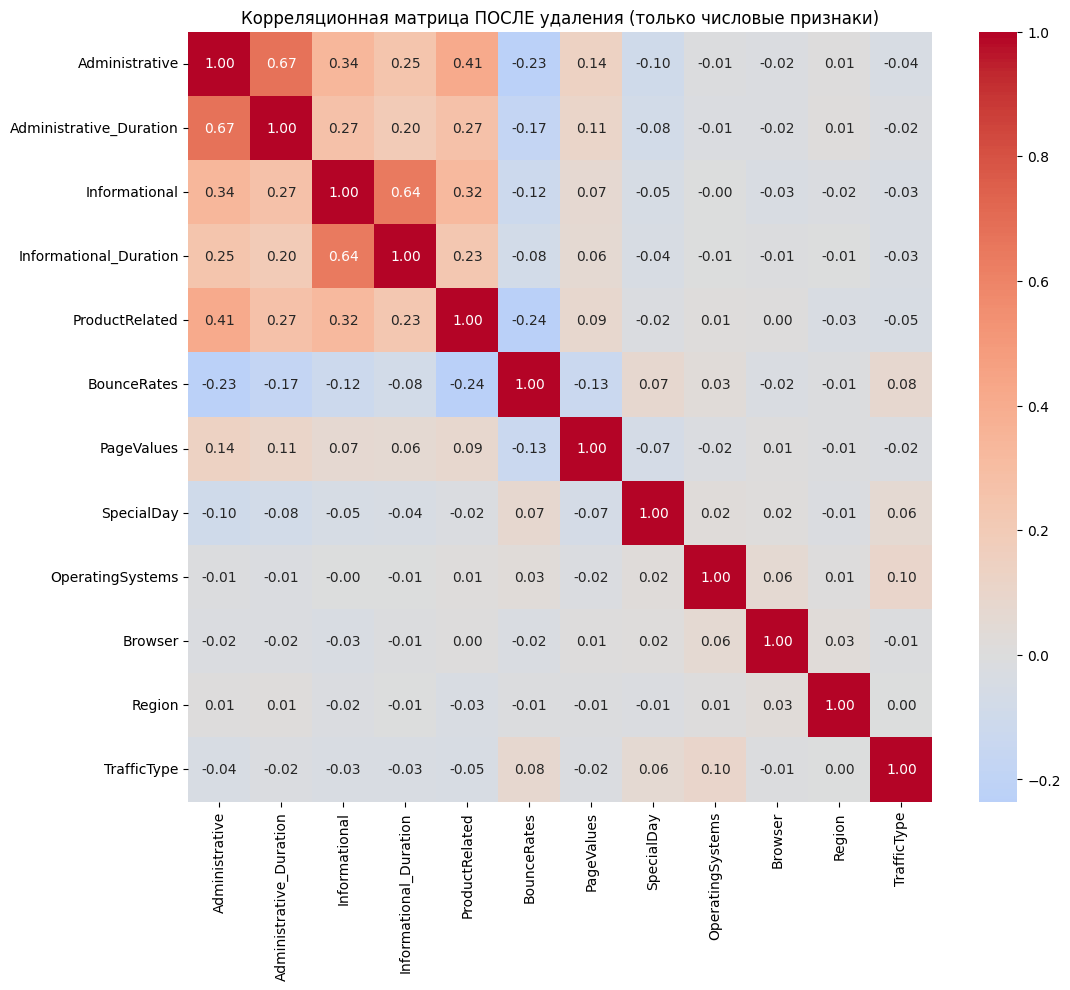


=== Проверка остаточных корреляций (|r| > 0.8) ===
Сильно коррелирующих пар (|r| > 0.8) больше нет.
• Категориальные признаки для кодирования: ['Month', 'VisitorType']
• Число столбцов до кодирования: 16
• Число столбцов после кодирования: 27
• Все категориальные признаки успешно закодированы.

Типы данных:
Administrative                     int64
Administrative_Duration          float64
Informational                      int64
Informational_Duration           float64
ProductRelated                     int64
BounceRates                      float64
PageValues                       float64
SpecialDay                       float64
OperatingSystems                   int64
Browser                            int64
Region                             int64
TrafficType                        int64
Weekend                            int64
Revenue                            int64
Month_Aug                          int64
Month_Dec                          int64
Month_Feb                         

In [5]:
# === Обработка категориальных признаков ===
print("=== Обработка категориальных признаков ===")

# Отделяем y временно
y = df_clean['Revenue']
X_temp = df_clean.drop('Revenue', axis=1)

# Удаляем коррелирующие признаки (согласно пункту 12, но делаем это здесь для корректности последовательности)
cols_to_drop = ['ExitRates', 'ProductRelated_Duration']
X_no_corr = X_temp.drop(columns=cols_to_drop, errors='ignore')
print(f"• Удалены коррелирующие признаки: {cols_to_drop}")

# === Проверка: Корреляционная матрица ПОСЛЕ удаления (только числовые признаки) ===
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Выбираем ТОЛЬКО числовые столбцы из X_no_corr (исключаем 'Month', 'VisitorType')
X_no_corr_numeric = X_no_corr.select_dtypes(include=[np.number])

# Строим корреляционную матрицу ТОЛЬКО по числовым признакам
corr_after = X_no_corr_numeric.corr()

# Визуализация
plt.figure(figsize=(12, 10))
sns.heatmap(corr_after, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Корреляционная матрица ПОСЛЕ удаления (только числовые признаки)")
plt.show()

# Проверяем, остались ли корреляции > 0.8
print("\n=== Проверка остаточных корреляций (|r| > 0.8) ===")
upper_triangle = corr_after.where(np.triu(np.ones(corr_after.shape), k=1).astype(bool))
high_corr = upper_triangle.stack().abs() > 0.8
if high_corr.any():
    print("Остались сильно коррелирующие признаки:")
    print(upper_triangle.stack()[high_corr])
else:
    print("Сильно коррелирующих пар (|r| > 0.8) больше нет.")

# Восстанавливаем y
df_for_encoding = pd.concat([X_no_corr, y], axis=1)

# Кодируем категориальные признаки
categorical_cols = df_for_encoding.select_dtypes(include=['object']).columns.tolist()
print(f"• Категориальные признаки для кодирования: {categorical_cols}")

df_encoded = pd.get_dummies(
    df_for_encoding,
    columns=categorical_cols,
    prefix=categorical_cols,
    drop_first=False
)

# Преобразуем bool в int
bool_cols = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

print(f"• Число столбцов до кодирования: {df_for_encoding.shape[1]}")
print(f"• Число столбцов после кодирования: {df_encoded.shape[1]}")

# Проверка
remaining_cat = df_encoded.select_dtypes(include=['object']).columns
if len(remaining_cat) == 0:
    print("• Все категориальные признаки успешно закодированы.")
else:
    print(f"Остались необработанные категориальные признаки: {remaining_cat}")

# Вывод типов и пропусков
print("\nТипы данных:")
print(df_encoded.dtypes)
print("\nКоличество пропущенных значений по столбцам:")
missing = df_encoded.isnull().sum()
print(missing[missing > 0])
if missing.sum() == 0:
    print("\nПропущенных значений нет!")

## 6. Нормализация данных
Поскольку методы кластеризации **KMeans**, **Agglomerative Clustering** и **DBSCAN** (при использовании евклидова расстояния) чувствительны к масштабу признаков, все **исходные числовые признаки** подвергнуты **стандартизации**:

$$
z = \frac{x - \mu}{\sigma}
$$

Нормализации подверглись 12 признаков:
- `Administrative`
- `Administrative_Duration`
- `Informational`
- `Informational_Duration`
- `ProductRelated`
- `BounceRates`
- `PageValues`
- `SpecialDay`
- `OperatingSystems`
- `Browser`
- `Region`
- `TrafficType`

Категориальные признаки (после one-hot) и бинарные (`Weekend`) **не нормализовались**, так как принимают значения 0/1.

Проверка на примере `PageValues` подтверждает корректность преобразования: среднее ≈ 0, стандартное отклонение = 1.

In [6]:
# Часть 6. Нормализация данных
# 1. Отделяем целевую переменную
y_final = df_encoded['Revenue']
X_raw = df_encoded.drop('Revenue', axis=1)

# 2. Определим, какие признаки НОРМАЛИЗОВАТЬ (только исходные числовые)
original_numerical = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'BounceRates',
    'PageValues', 'SpecialDay',
    'OperatingSystems', 'Browser',
    'Region', 'TrafficType'
]

# Удалим те, что уже исключены на шаге 12
numerical_to_scale = [col for col in original_numerical if col in X_raw.columns]
print(f"• Признаки для нормализации ({len(numerical_to_scale)} шт.):")
print(numerical_to_scale)

# 3. Стандартизация: (x - mean) / std
X_scaled = X_raw.copy()
X_scaled[numerical_to_scale] = (
    X_raw[numerical_to_scale] - X_raw[numerical_to_scale].mean()
) / X_raw[numerical_to_scale].std()

# 4. Проверим результат на одном признаке
print(f"\n• Пример (PageValues):")
print(f"   До: mean={X_raw['PageValues'].mean():.2f}, std={X_raw['PageValues'].std():.2f}")
print(f"   После: mean={X_scaled['PageValues'].mean():.2f}, std={X_scaled['PageValues'].std():.2f}")

# 5. Финальные данные для обучения
print(f"\nГотово! Финальный набор:")
print(f"   X.shape = {X_scaled.shape}, y.shape = {y_final.shape}")

• Признаки для нормализации (12 шт.):
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'BounceRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']

• Пример (PageValues):
   До: mean=5.03, std=14.00
   После: mean=-0.00, std=1.00

Готово! Финальный набор:
   X.shape = (11915, 26), y.shape = (11915,)


## 7. Подготовка данных для кластеризации (исключение `Revenue`)
На данном этапе:
- X_scaled — датафрейм с нормализованными признаками, **НЕ** содержащий `Revenue`
- y_final — вектор истинных меток (`Revenue`), который НЕ используется при обучении, но будет использован для сравнения с результатами кластеризации

In [7]:
# X_scaled — датафрейм с нормализованными признаками (без Revenue)
# y_final — вектор истинных меток (Revenue), используется ТОЛЬКО для оценки
X_cluster = X_scaled.copy()
y_true = y_final.copy()

print(f"• Данные для кластеризации: {X_cluster.shape}")
print(f"• Истинные метки (для сравнения): {y_true.shape}")

• Данные для кластеризации: (11915, 26)
• Истинные метки (для сравнения): (11915,)


## 8. Применение PCA: для визуализации и для кластеризации

• PCA (визуализация, 2 комп.): 29.13%
• PCA (кластеризация, 15 комп.): 96.01%


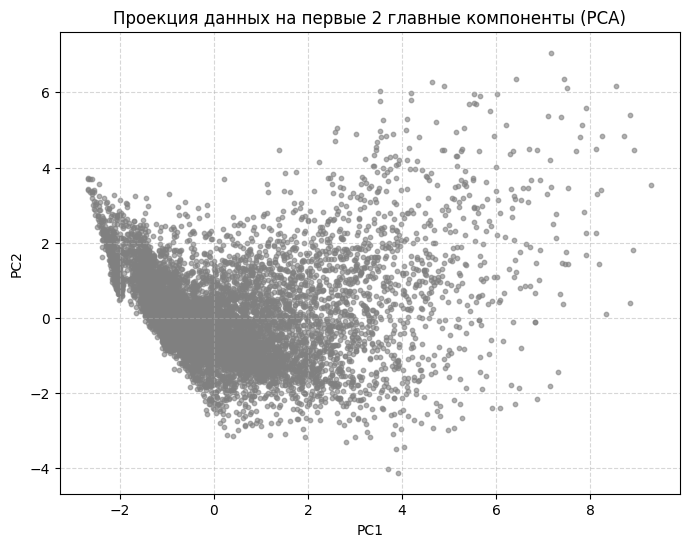

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA для визуализации — 2 компоненты
pca_vis = PCA(n_components=2, random_state=52)
X_pca_vis = pca_vis.fit_transform(X_cluster)

# PCA для кластеризации — 15 компонент (сохраняет ~96% дисперсии)
pca_full = PCA(n_components=15, random_state=52)
X_pca_full = pca_full.fit_transform(X_cluster)

# Вывод доли объяснённой дисперсии
print(f"• PCA (визуализация, 2 комп.): {pca_vis.explained_variance_ratio_.sum():.2%}")
print(f"• PCA (кластеризация, 15 комп.): {pca_full.explained_variance_ratio_.sum():.2%}")

# Проекция данных (без кластеров)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_vis[:, 0], X_pca_vis[:, 1], alpha=0.6, s=10, color='gray')
plt.title("Проекция данных на первые 2 главные компоненты (PCA)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Подбор параметров для DBSCAN 

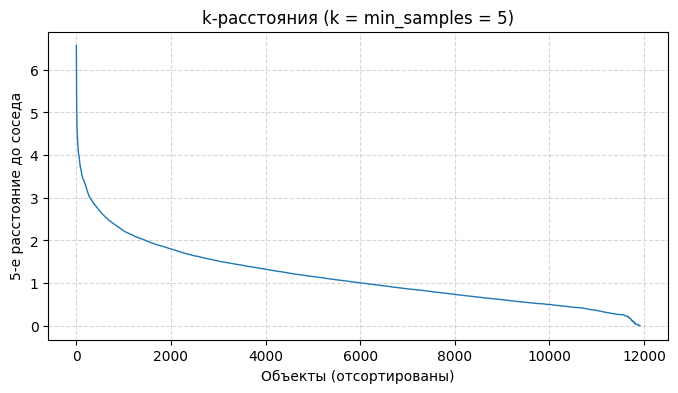

eps    | Кластеров  | Шум (%)    | ARI       
--------------------------------------------------
1.0    | 55         | 43.05      | -0.0089   
1.5    | 8          | 19.23      | -0.0003   
2.0    | 7          | 8.27       | 0.0014    
2.5    | 1          | 3.26       | 0.0000    
3.0    | 1          | 1.23       | 0.0000    

-> Лучший eps: 2.0 (ARI = 0.0014)


In [9]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import adjusted_rand_score
import numpy as np
from sklearn.cluster import DBSCAN

# Шаг 1: k-distance plot
min_samples = 5
nbrs = NearestNeighbors(n_neighbors=min_samples).fit(X_pca_full)
distances, _ = nbrs.kneighbors(X_pca_full)
k_distances = np.sort(distances[:, -1], axis=0)[::-1]

plt.figure(figsize=(8, 4))
plt.plot(k_distances, linewidth=1)
plt.title(f"k-расстояния (k = min_samples = {min_samples})")
plt.xlabel("Объекты (отсортированы)")
plt.ylabel(f"{min_samples}-е расстояние до соседа")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Шаг 2: тестирование eps
eps_candidates = [1.0, 1.5, 2.0, 2.5, 3.0]
y_true_int = y_true.astype(int)
results = []

print(f"{'eps':<6} | {'Кластеров':<10} | {'Шум (%)':<10} | {'ARI':<10}")
print("-" * 50)

for eps in eps_candidates:
    dbscan_test = DBSCAN(eps=eps, min_samples=min_samples)
    labels_test = dbscan_test.fit_predict(X_pca_full)
    
    n_clusters = len(set(labels_test)) - (1 if -1 in labels_test else 0)
    n_noise = list(labels_test).count(-1)
    noise_pct = n_noise / len(labels_test) * 100
    
    # Сравнение с Revenue (игнорируем шум)
    if n_clusters > 0:
        mask = labels_test != -1
        ari = adjusted_rand_score(y_true_int[mask], labels_test[mask])
    else:
        ari = 0.0
    
    results.append({'eps': eps, 'n_clusters': n_clusters, 'n_noise': n_noise, 'noise_pct': noise_pct, 'ari': ari})
    print(f"{eps:<6} | {n_clusters:<10} | {noise_pct:<10.2f} | {ari:<10.4f}")

# Шаг 3: выбор лучшего eps
best_result = max(results, key=lambda r: r['ari'])
best_eps = best_result['eps']
print(f"\n-> Лучший eps: {best_eps} (ARI = {best_result['ari']:.4f})")

## 9. Кластеризация методом KMeans

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=52, n_init=10)
labels_kmeans = kmeans.fit_predict(X_pca_full)

print("• KMeans: количество объектов в кластерах:", 
      pd.Series(labels_kmeans).value_counts().sort_index().tolist())

• KMeans: количество объектов в кластерах: [2158, 9757]


## 10. Кластеризация методом DBSCAN

In [11]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=best_eps, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_pca_full)

n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise = list(labels_dbscan).count(-1)
print(f"• DBSCAN: кластеров = {n_clusters}, шумовых точек = {n_noise}")

• DBSCAN: кластеров = 7, шумовых точек = 985


## 11. Кластеризация методом Agglomerative Clustering

In [12]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=2)
labels_agglo = agglo.fit_predict(X_pca_full)

print("• Agglomerative Clustering: количество объектов в кластерах:", 
      pd.Series(labels_agglo).value_counts().sort_index().tolist())

• Agglomerative Clustering: количество объектов в кластерах: [9518, 2397]


## 12. Визуализация результатов кластеризации (на PCA)

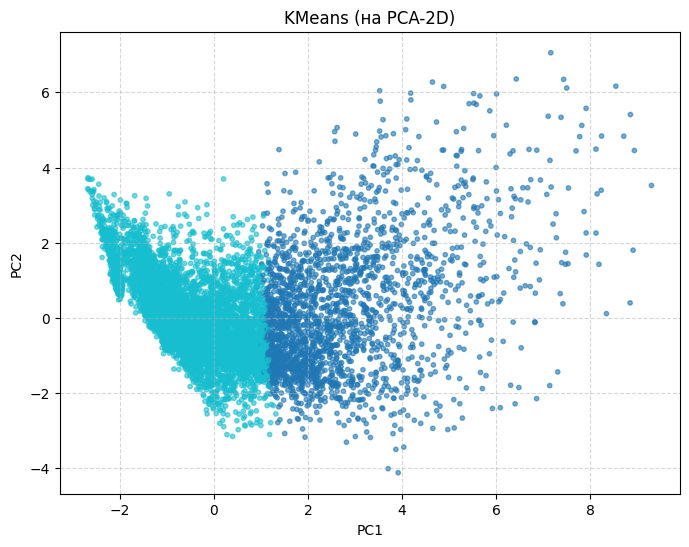

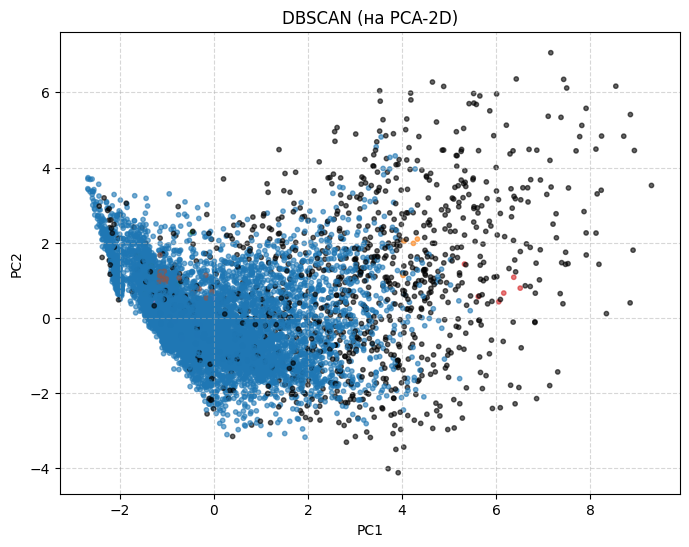

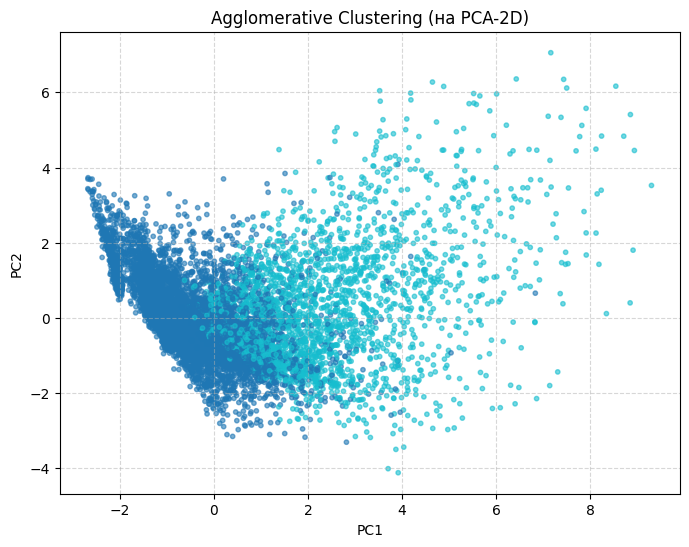

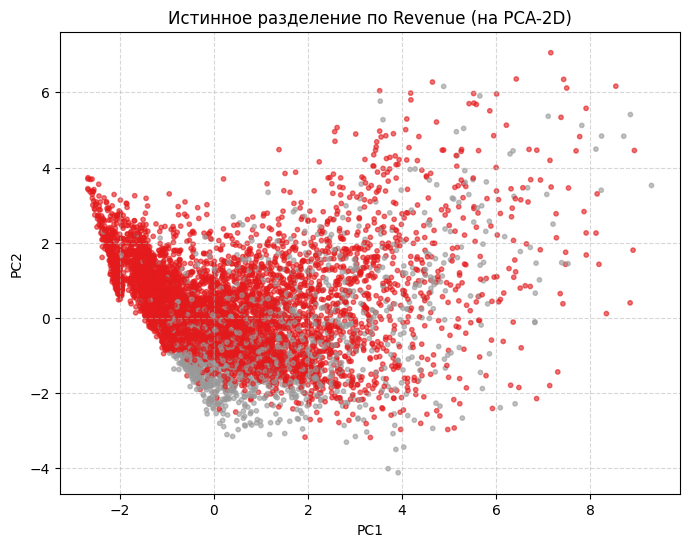

In [13]:
# KMeans
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_vis[:, 0], X_pca_vis[:, 1], c=labels_kmeans, cmap='tab10', alpha=0.6, s=10)
plt.title("KMeans (на PCA-2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# DBSCAN (шум = чёрный)
colors_dbscan = ['black' if label == -1 else plt.cm.tab10(label % 10) for label in labels_dbscan]
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_vis[:, 0], X_pca_vis[:, 1], c=colors_dbscan, alpha=0.6, s=10)
plt.title("DBSCAN (на PCA-2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Agglomerative
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_vis[:, 0], X_pca_vis[:, 1], c=labels_agglo, cmap='tab10', alpha=0.6, s=10)
plt.title("Agglomerative Clustering (на PCA-2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Истинные метки (Revenue)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_vis[:, 0], X_pca_vis[:, 1], c=y_true_int, cmap='Set1', alpha=0.6, s=10)
plt.title("Истинное разделение по Revenue (на PCA-2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## 13. Сравнение меток кластеров с истинными метками (`Revenue`)

In [14]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

def compare_with_true(labels, name, y_true_int):
    if name == "DBSCAN":
        mask = labels != -1
        ari = adjusted_rand_score(y_true_int[mask], labels[mask])
        nmi = normalized_mutual_info_score(y_true_int[mask], labels[mask])
    else:
        ari = adjusted_rand_score(y_true_int, labels)
        nmi = normalized_mutual_info_score(y_true_int, labels)
    print(f"{name:14} |=> ARI = {ari:.4f}, NMI = {nmi:.4f}")
    return ari, nmi

print("\nСравнение с истинными метками (Revenue):")
ari_kmeans, nmi_kmeans = compare_with_true(labels_kmeans, "KMeans", y_true_int)
ari_dbscan, nmi_dbscan = compare_with_true(labels_dbscan, "DBSCAN", y_true_int)
ari_agglo, nmi_agglo = compare_with_true(labels_agglo, "Agglomerative", y_true_int)


Сравнение с истинными метками (Revenue):
KMeans         |=> ARI = 0.1064, NMI = 0.0246
DBSCAN         |=> ARI = 0.0014, NMI = 0.0047
Agglomerative  |=> ARI = 0.0708, NMI = 0.0127


## 14. Общие выводы

- Проведена кластеризация без учителя на тех же данных, что использовались в лабораторной №4.
- Целевая переменная `Revenue` **не использовалась при обучении**, в полном соответствии с условием.
- Для снижения шума применён PCA (15 компонент, объясняет ~96% дисперсии).
- Результаты сравнения с `Revenue`:
  - **KMeans (n_clusters=2)**: ARI = 0.1064, NMI = 0.0246 — лучший результат.
  - **Agglomerative Clustering (n_clusters=2)**: ARI = 0.0708, NMI = 0.0127.
  - **DBSCAN (eps=2.0, min_samples=5)**: ARI = 0.0014, NMI = 0.0047 — близко к случайному совпадению.
- Низкие значения ARI/NMI подтверждают: поведение пользователей не образует чётких кластеров, соответствующих факту покупки.
- **DBSCAN оказался неэффективен**, так как данные не содержат плотных областей.
- **KMeans показал наилучший результат**, что объясняется заданием числа кластеров, соответствующего бинарной природе `Revenue`.
- **Вывод**: кластеризация позволяет частично выявить скрытые группы, связанные с `Revenue`, но не может заменить обучение с учителем в этой задаче.